In [2]:
import pandas as pd
import os

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
project_path = '/content/drive/MyDrive/Lalor_Project'

In [16]:
os.chdir(project_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Lalor_Project'

Reading in our entire dataset

In [17]:
bigdata = pd.read_csv('/content/drive/MyDrive/Lalor_Project/batter_statcast.csv', index_col="batter_team")
bigdata.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,pitcher_team
batter_team,,,,,,,,,,,,,,,,,,,,,
LAD,ST,2024-10-20,78.8,4.10,5.27,"Muncy, Max",571970,640455,walk,ball,...,4,1,Infield shade,Standard,294.0,0.016,0.257,NaN,NaN,NYM
LAD,CH,2024-10-20,83.9,4.16,5.13,"Muncy, Max",571970,640455,NaN,ball,...,4,1,Infield shade,Standard,106.0,0.000,0.110,NaN,NaN,NYM
LAD,SI,2024-10-20,91.9,4.03,4.97,"Muncy, Max",571970,640455,NaN,ball,...,4,1,Infield shade,Standard,113.0,0.000,0.048,NaN,NaN,NYM
LAD,ST,2024-10-20,80.2,3.84,5.31,"Muncy, Max",571970,640455,NaN,ball,...,4,1,Infield shade,Standard,284.0,0.000,0.023,NaN,NaN,NYM
LAD,ST,2024-10-20,78.9,3.89,5.26,"Muncy, Max",571970,640455,NaN,foul,...,4,1,Infield shade,Standard,283.0,0.000,-0.033,NaN,NaN,NYM


In [18]:
bigdata.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher_1',
       'fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

Creating a new data set that has all of the variables we want to look at

In [23]:
usable_columns = ['pitch_type', 'release_speed', 'player_name', 'events', 'description',
                   'p_throws', 'balls', 'strikes', 'plate_x', 'plate_z', 'batter',
       'on_3b', 'on_2b', 'outs_when_up', 'inning', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
                  'launch_speed_angle', 'pitch_name', 'if_fielding_alignment', 'bat_speed', 'swing_length', 'zone']

In [24]:
finaldata = bigdata[usable_columns]
finaldata.head()

finaldata.to_csv('batter_by_pitch_woba_cut.csv', index=False)

by_p_hand_clean.to_csv('by_p_hand_clean.csv', index=False)


NameError: name 'by_p_hand_clean' is not defined

Since we are looking at xWOBA, we want to filter on plays that have balls hit into play

In [ ]:
allwoba = finaldata.dropna(subset=['estimated_woba_using_speedangle'])
allwoba.describe()

Splitting into different pitches and calculating the average xWOBA across all pitch types. We also wanted to count the number of times each pitch was thrown.

In [20]:
batter_by_pitch_woba = (
    finaldata.groupby(['pitch_name', 'batter', 'player_name'])
    .agg(
        mean_estimated_woba=('estimated_woba_using_speedangle', 'mean'),
        pitch_count=('estimated_woba_using_speedangle', 'count')  # Count the number of pitches
    )
    .reset_index()
)

# we get rid of pitches that are not thrown enough over the course of the season to be relevant
batter_by_pitch_woba = batter_by_pitch_woba[~batter_by_pitch_woba['pitch_name'].isin(['Forkball','Pitch Out', 'Eephus', 'Other',
                                                                                      'Slow Curve', 'Knuckleball'])]

batter_by_pitch_woba_cut = batter_by_pitch_woba[batter_by_pitch_woba['pitch_count'] >= 20]
# filtering for minimum of 20 pitches

NameError: name 'finaldata' is not defined

In [ ]:
batter_by_pitch_woba_cut['bypitch_woba_rank'] = batter_by_pitch_woba_cut['mean_estimated_woba'].rank(
    ascending=False, method='dense'
)

batter_by_pitch_woba_cut

<ipython-input-123-cab352ca26be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_by_pitch_woba_cut['bypitch_woba_rank'] = batter_by_pitch_woba_cut['mean_estimated_woba'].rank(


,pitch_name,batter,player_name,mean_estimated_woba,pitch_count,bypitch_woba_rank
0,4-Seam Fastball,444482,"Peralta, David",0.306296,87,1336.0
1,4-Seam Fastball,453568,"Blackmon, Charlie",0.310847,173,1276.0
2,4-Seam Fastball,455117,"Maldonado, Martín",0.238052,52,2210.0
3,4-Seam Fastball,456781,"Solano, Donovan",0.387714,92,333.0
4,4-Seam Fastball,457705,"McCutchen, Andrew",0.339167,146,852.0
...,...,...,...,...,...,...
6776,Sweeper,694384,"Schanuel, Nolan",0.264848,30,1928.0
6779,Sweeper,694671,"Langford, Wyatt",0.371181,35,468.0
6784,Sweeper,695578,"Wood, James",0.460023,28,66.0
6786,Sweeper,696285,"Young, Jacob",0.249223,43,2091.0


In [ ]:
average_rank_per_batter = batter_by_pitch_woba_cut.groupby('batter', as_index=False)['bypitch_woba_rank'].mean()

# Rename the column for clarity
average_rank_per_batter.rename(columns={'bypitch_woba_rank': 'avgbypitch_wobarank'}, inplace=True)

# Merge the average rank back into the original dataframe if needed
batter_by_pitch_woba_cut = batter_by_pitch_woba_cut.merge(
    average_rank_per_batter,
    on='batter',
    how='left'
)

In [1]:
batter_by_pitch_woba_cut

NameError: name 'batter_by_pitch_woba_cut' is not defined

In [ ]:
batter_by_pitch_woba_cut
# writing csv for further visualizations
batter_by_pitch_woba_cut.to_csv('batter_by_pitch_woba_cut.csv', index=False)

In [ ]:
by_p_hand = finaldata.dropna(subset=['estimated_woba_using_speedangle'])

by_p_hand = (
    finaldata.groupby(['p_throws', 'batter', 'player_name'])
    .agg(
        mean_estimated_woba=('estimated_woba_using_speedangle', 'mean'),
        pitch_count=('estimated_woba_using_speedangle', 'count')  # Count the number of pitches
    )
    .reset_index()
)

by_p_hand_clean = by_p_hand[by_p_hand['pitch_count'] >= 60]
# filtering for minimum of 60 pitches

In [ ]:
by_p_hand_clean['pitch_hand_woba_rank'] = by_p_hand_clean['mean_estimated_woba'].rank(
    ascending=False, method='dense'
)

by_p_hand_clean

<ipython-input-128-582ba56c4e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_p_hand_clean['pitch_hand_woba_rank'] = by_p_hand_clean['mean_estimated_woba'].rank(


,p_throws,batter,player_name,mean_estimated_woba,pitch_count,pitch_hand_woba_rank
1,L,453568,"Blackmon, Charlie",0.309137,113,393.0
3,L,456781,"Solano, Donovan",0.333313,120,229.0
4,L,457705,"McCutchen, Andrew",0.328255,136,257.0
5,L,457759,"Turner, Justin",0.367414,139,73.0
6,L,467793,"Santana, Carlos",0.366455,158,80.0
...,...,...,...,...,...,...
1275,R,702358,"Lipscomb, Trey",0.277406,133,627.0
1276,R,702616,"Holliday, Jackson",0.259392,162,713.0
1278,R,805779,"Wilson, Jacob",0.301512,80,460.0
1279,R,807799,"Yoshida, Masataka",0.337122,306,198.0


from matplotlib import pyplot as plt
by_p_hand_clean['batter'].plot(kind='hist', bins=20, title='batter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean['mean_estimated_woba'].plot(kind='hist', bins=20, title='mean_estimated_woba')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean['pitch_count'].plot(kind='hist', bins=20, title='pitch_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean['pitch_hand_woba_rank'].plot(kind='hist', bins=20, title='pitch_hand_woba_rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
by_p_hand_clean.groupby('p_throws').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean.plot(kind='scatter', x='batter', y='mean_estimated_woba', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean.plot(kind='scatter', x='mean_estimated_woba', y='pitch_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean.plot(kind='scatter', x='pitch_count', y='pitch_hand_woba_rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean['batter'].plot(kind='line', figsize=(8, 4), title='batter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean['mean_estimated_woba'].plot(kind='line', figsize=(8, 4), title='mean_estimated_woba')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean['pitch_count'].plot(kind='line', figsize=(8, 4), title='pitch_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
by_p_hand_clean['pitch_hand_woba_rank'].plot(kind='line', figsize=(8, 4), title='pitch_hand_woba_rank')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(by_p_hand_clean['p_throws'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(by_p_hand_clean, x='batter', y='p_throws', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(by_p_hand_clean['p_throws'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(by_p_hand_clean, x='mean_estimated_woba', y='p_throws', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(by_p_hand_clean['p_throws'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(by_p_hand_clean, x='pitch_count', y='p_throws', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(by_p_hand_clean['p_throws'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(by_p_hand_clean, x='pitch_hand_woba_rank', y='p_throws', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
by_p_hand_clean.to_csv('by_p_hand_clean.csv', index=False)
# writing csv for further visualizations

In [ ]:
risp_data = finaldata[(~finaldata['on_2b'].isna()) | (~finaldata['on_3b'].isna())]

risp_woba = risp_data.groupby(['batter', 'player_name']).agg(
    mean_estimated_woba=('estimated_woba_using_speedangle', 'mean'),
    pitch_count=('estimated_woba_using_speedangle', 'count')  # Count the number of pitches
).reset_index()

In [ ]:
risp_woba = risp_woba[risp_woba['pitch_count'] >= 40]
# filtering for minimum of 40 pitches


risp_woba['risp_woba_rank'] = risp_woba['mean_estimated_woba'].rank(
    ascending=False, method='dense'
)

risp_woba

,batter,player_name,mean_estimated_woba,pitch_count,risp_woba_rank
0,444482,"Peralta, David",0.337092,63,120.0
1,453568,"Blackmon, Charlie",0.297141,107,246.0
3,456781,"Solano, Donovan",0.329007,73,141.0
4,457705,"McCutchen, Andrew",0.326869,109,144.0
5,457759,"Turner, Justin",0.336116,146,123.0
...,...,...,...,...,...
635,700250,"Rice, Ben",0.353892,50,78.0
638,701538,"Merrill, Jackson",0.353844,149,79.0
639,702358,"Lipscomb, Trey",0.258346,58,351.0
640,702616,"Holliday, Jackson",0.319290,54,174.0


In [ ]:
risp_woba

risp_woba.to_csv('risp_woba.csv', index=False)

In [ ]:
velos = finaldata.dropna(subset=['launch_speed'])
exit_velos = (
    velos.groupby(['batter', 'player_name'])
    .agg(
        mean_exit_velo=('launch_speed', 'mean'),
        mean_estimated_woba =('estimated_woba_using_speedangle', 'mean'),
        pitch_count=('estimated_woba_using_speedangle', 'count')  # Count the number of pitches
    )
    .reset_index()
)

In [ ]:
exit_velos = exit_velos[exit_velos['pitch_count'] >= 100]

exit_velos['exit_velo_rank'] = exit_velos['mean_exit_velo'].rank(
    ascending=False, method='dense'
)

In [ ]:
exit_velos

,batter,player_name,mean_exit_velo,mean_estimated_woba,pitch_count,exit_velo_rank
0,444482,"Peralta, David",82.853659,0.354098,194,169.0
1,453568,"Blackmon, Charlie",80.216788,0.330256,356,359.0
3,456781,"Solano, Donovan",81.959211,0.358088,228,252.0
4,457705,"McCutchen, Andrew",82.935413,0.401978,312,163.0
5,457759,"Turner, Justin",81.376435,0.347372,366,296.0
...,...,...,...,...,...,...
643,701538,"Merrill, Jackson",83.054865,0.439478,469,145.0
644,702358,"Lipscomb, Trey",80.106475,0.277207,150,363.0
645,702616,"Holliday, Jackson",83.107359,0.350410,122,140.0
648,807799,"Yoshida, Masataka",82.938699,0.327953,322,162.0


from matplotlib import pyplot as plt
exit_velos['batter'].plot(kind='hist', bins=20, title='batter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
exit_velos['mean_exit_velo'].plot(kind='hist', bins=20, title='mean_exit_velo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
exit_velos['mean_estimated_woba'].plot(kind='hist', bins=20, title='mean_estimated_woba')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
exit_velos['pitch_count'].plot(kind='hist', bins=20, title='pitch_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
exit_velos.plot(kind='scatter', x='batter', y='mean_exit_velo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
exit_velos.plot(kind='scatter', x='mean_exit_velo', y='mean_estimated_woba', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
exit_velos.plot(kind='scatter', x='mean_estimated_woba', y='pitch_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
exit_velos.plot(kind='scatter', x='pitch_count', y='exit_velo_rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['mean_exit_velo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = exit_velos.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('mean_exit_velo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['mean_estimated_woba']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = exit_velos.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('mean_estimated_woba')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['pitch_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = exit_velos.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('pitch_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['exit_velo_rank']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = exit_velos.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('exit_velo_rank')

from matplotlib import pyplot as plt
exit_velos['batter'].plot(kind='line', figsize=(8, 4), title='batter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
exit_velos['mean_exit_velo'].plot(kind='line', figsize=(8, 4), title='mean_exit_velo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
exit_velos['mean_estimated_woba'].plot(kind='line', figsize=(8, 4), title='mean_estimated_woba')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
exit_velos['pitch_count'].plot(kind='line', figsize=(8, 4), title='pitch_count')
plt.gca().spines[['top', 'right']].set_visible(False)

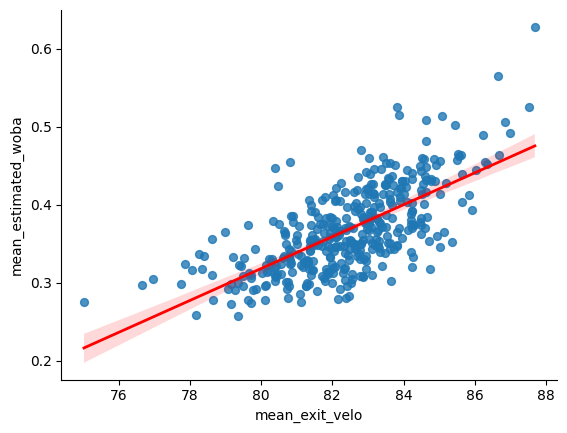

In [ ]:
exit_velos.plot(kind='scatter', x='mean_exit_velo', y='mean_estimated_woba', s=32, alpha=.8)
sns.regplot(x='mean_exit_velo', y='mean_estimated_woba', data=exit_velos, scatter=False, color='red', line_kws={"linewidth":2})

plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
exit_velos

exit_velos.to_csv('exit_velos.csv', index=False)

In [ ]:
launch = finaldata.dropna(subset=['launch_angle'])
angles_of_launch = (
    launch.groupby(['batter', 'player_name'])
    .agg(
        mean_launch_angle=('launch_angle', 'mean'),
        mean_estimated_woba =('estimated_woba_using_speedangle', 'mean'),
        pitch_count=('estimated_woba_using_speedangle', 'count')  # Count the number of pitches
    )
    .reset_index()
)

angles_of_launch = angles_of_launch[angles_of_launch['pitch_count'] >= 100]


angles_of_launch['launch_angle_rank'] = angles_of_launch['mean_launch_angle'].rank(
    ascending=False, method='dense'
)

angles_of_launch.to_csv('angles_of_launch.csv', index=False)

In [ ]:
angles_of_launch

,batter,player_name,mean_launch_angle,mean_estimated_woba,pitch_count,launch_angle_rank
0,444482,"Peralta, David",14.831978,0.354098,194,299.0
1,453568,"Blackmon, Charlie",19.906706,0.330256,356,103.0
3,456781,"Solano, Donovan",19.146930,0.358088,228,128.0
4,457705,"McCutchen, Andrew",16.510961,0.401978,312,242.0
5,457759,"Turner, Justin",23.445665,0.347372,366,17.0
...,...,...,...,...,...,...
643,701538,"Merrill, Jackson",19.355072,0.439478,469,122.0
644,702358,"Lipscomb, Trey",10.724014,0.277207,150,386.0
645,702616,"Holliday, Jackson",19.515152,0.350410,122,117.0
648,807799,"Yoshida, Masataka",14.155822,0.327953,322,317.0


from matplotlib import pyplot as plt
angles_of_launch['batter'].plot(kind='hist', bins=20, title='batter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch['mean_launch_angle'].plot(kind='hist', bins=20, title='mean_launch_angle')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch['mean_estimated_woba'].plot(kind='hist', bins=20, title='mean_estimated_woba')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch['pitch_count'].plot(kind='hist', bins=20, title='pitch_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch.plot(kind='scatter', x='batter', y='mean_launch_angle', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch.plot(kind='scatter', x='mean_launch_angle', y='mean_estimated_woba', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch.plot(kind='scatter', x='mean_estimated_woba', y='pitch_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch.plot(kind='scatter', x='pitch_count', y='launch_angle_rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['mean_launch_angle']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = angles_of_launch.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('mean_launch_angle')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['mean_estimated_woba']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = angles_of_launch.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('mean_estimated_woba')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['pitch_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = angles_of_launch.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('pitch_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['launch_angle_rank']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = angles_of_launch.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('launch_angle_rank')

from matplotlib import pyplot as plt
angles_of_launch['batter'].plot(kind='line', figsize=(8, 4), title='batter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch['mean_launch_angle'].plot(kind='line', figsize=(8, 4), title='mean_launch_angle')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch['mean_estimated_woba'].plot(kind='line', figsize=(8, 4), title='mean_estimated_woba')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
angles_of_launch['pitch_count'].plot(kind='line', figsize=(8, 4), title='pitch_count')
plt.gca().spines[['top', 'right']].set_visible(False)

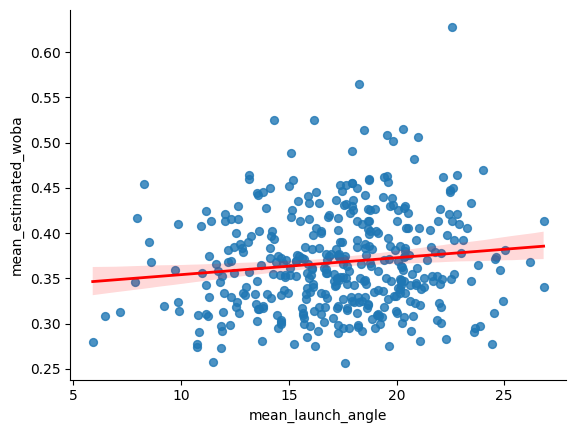

In [ ]:
angles_of_launch.plot(kind='scatter', x='mean_launch_angle', y='mean_estimated_woba', s=32, alpha=0.8)

sns.regplot(x='mean_launch_angle', y='mean_estimated_woba', data=angles_of_launch, scatter=False, color='red', line_kws={"linewidth":2})

plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
swing_speed = finaldata.dropna(subset=['bat_speed'])
speed_of_swing = (
    swing_speed.groupby(['batter', 'player_name'])
    .agg(
        mean_swing_speed=('bat_speed', 'mean'),
        mean_estimated_woba =('estimated_woba_using_speedangle', 'mean'),
        pitch_count=('bat_speed', 'count')  # Count the number of pitches
    )
    .reset_index()
)

speed_of_swing = speed_of_swing[speed_of_swing['pitch_count'] >= 200]

speed_of_swing['swing_speed_rank'] = speed_of_swing['mean_swing_speed'].rank(
    ascending=False, method='dense'
)

speed_of_swing.to_csv('speed_of_swing.csv', index=False)


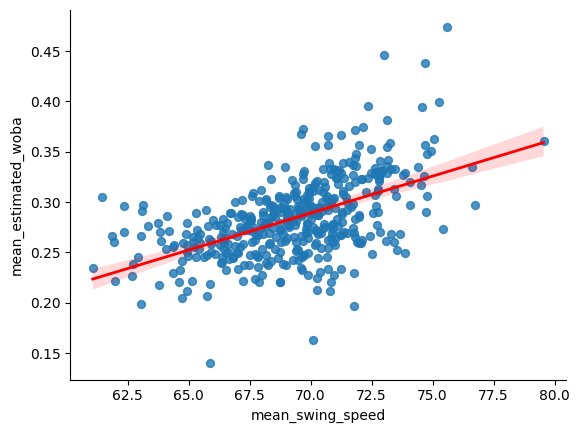

In [ ]:
speed_of_swing.plot(kind='scatter', x='mean_swing_speed', y='mean_estimated_woba', s=32, alpha=.8)
sns.regplot(x='mean_swing_speed', y='mean_estimated_woba', data=speed_of_swing, scatter=False, color='red', line_kws={"linewidth":2})
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
swing_length = finaldata.dropna(subset=['swing_length'])
length_of_swing = (
    swing_length.groupby(['batter', 'player_name'])
    .agg(
        mean_swing_length=('swing_length', 'mean'),
        mean_estimated_woba =('estimated_woba_using_speedangle', 'mean'),
        pitch_count=('swing_length', 'count')  # Count the number of pitches
    )
    .reset_index()
)

length_of_swing = length_of_swing[length_of_swing['pitch_count'] >= 200]

length_of_swing['swing_length_rank'] = length_of_swing['mean_swing_length'].rank(
    ascending=False, method='dense'
)


length_of_swing.to_csv('length_of_swing.csv', index=False)

In [ ]:
length_of_swing

,batter,player_name,mean_swing_length,mean_estimated_woba,pitch_count,swing_length_rank
0,444482,"Peralta, David",7.117263,0.288504,528,252.0
1,453568,"Blackmon, Charlie",7.062352,0.261581,847,276.0
2,455117,"Maldonado, Martín",7.503664,0.220640,247,98.0
3,456781,"Solano, Donovan",6.905331,0.264925,595,339.0
4,457705,"McCutchen, Andrew",7.572726,0.300005,850,70.0
...,...,...,...,...,...,...
643,701538,"Merrill, Jackson",7.449005,0.355356,1210,115.0
644,702358,"Lipscomb, Trey",7.574769,0.220933,354,69.0
645,702616,"Holliday, Jackson",6.985525,0.244121,377,312.0
648,807799,"Yoshida, Masataka",7.213302,0.291686,669,207.0


from matplotlib import pyplot as plt
length_of_swing['batter'].plot(kind='hist', bins=20, title='batter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing['mean_swing_length'].plot(kind='hist', bins=20, title='mean_swing_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing['mean_estimated_woba'].plot(kind='hist', bins=20, title='mean_estimated_woba')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing['pitch_count'].plot(kind='hist', bins=20, title='pitch_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing.plot(kind='scatter', x='batter', y='mean_swing_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing.plot(kind='scatter', x='mean_swing_length', y='mean_estimated_woba', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing.plot(kind='scatter', x='mean_estimated_woba', y='pitch_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing.plot(kind='scatter', x='pitch_count', y='swing_length_rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['mean_swing_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = length_of_swing.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('mean_swing_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['mean_estimated_woba']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = length_of_swing.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('mean_estimated_woba')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['pitch_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = length_of_swing.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('pitch_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['batter']
  ys = series['swing_length_rank']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = length_of_swing.sort_values('batter', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('batter')
_ = plt.ylabel('swing_length_rank')

from matplotlib import pyplot as plt
length_of_swing['batter'].plot(kind='line', figsize=(8, 4), title='batter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing['mean_swing_length'].plot(kind='line', figsize=(8, 4), title='mean_swing_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing['mean_estimated_woba'].plot(kind='line', figsize=(8, 4), title='mean_estimated_woba')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
length_of_swing['pitch_count'].plot(kind='line', figsize=(8, 4), title='pitch_count')
plt.gca().spines[['top', 'right']].set_visible(False)

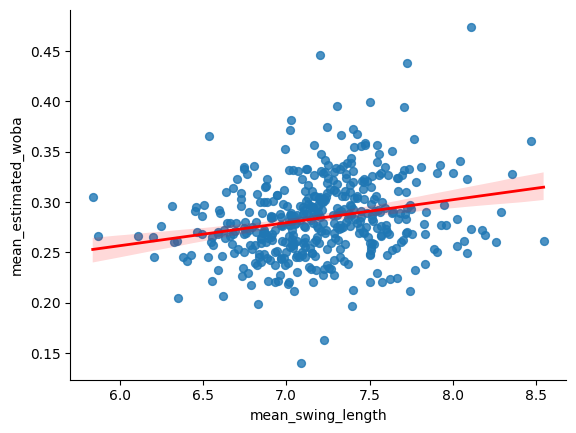

In [ ]:
length_of_swing.plot(kind='scatter', x='mean_swing_length', y='mean_estimated_woba', s=32, alpha=.8)
sns.regplot(x='mean_swing_length', y='mean_estimated_woba', data=length_of_swing, scatter=False, color='red', line_kws={"linewidth":2})
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
speed_of_swing_rank = speed_of_swing[['batter', 'swing_speed_rank']]
length_of_swing_rank = length_of_swing[['batter', 'swing_length_rank']]
angles_of_launch_rank = angles_of_launch[['batter', 'launch_angle_rank']]
exit_velos_rank = exit_velos[['batter', 'exit_velo_rank']]
risp_woba_rank = risp_woba[['batter', 'risp_woba_rank']]
by_p_hand_clean_rank = by_p_hand_clean[['batter', 'pitch_hand_woba_rank']]
batter_by_pitch_woba_rank = batter_by_pitch_woba_cut[['batter', 'avgbypitch_wobarank']]

In [ ]:
rank_columns = [
    'swing_speed_rank',
    'swing_length_rank',
    'launch_angle_rank',
    'exit_velo_rank',
    'risp_woba_rank',
    'pitch_hand_woba_rank',
    'avgbypitch_wobarank'
]

# Add a new column for the average rank
merged_ranks['average_rank'] = merged_ranks[rank_columns].mean(axis=1)
merged_ranks_unique = merged_ranks.drop_duplicates(subset='batter', keep='first')

In [ ]:
merged_ranks_unique

,batter,swing_speed_rank,player_name,swing_length_rank,launch_angle_rank,exit_velo_rank,risp_woba_rank,pitch_hand_woba_rank,avgbypitch_wobarank,average_rank
0,444482,220.0,"Peralta, David",252.0,299.0,169.0,120.0,359.0,1251.800000,381.542857
5320,453568,381.0,"Blackmon, Charlie",276.0,103.0,359.0,246.0,393.0,1180.714286,419.816327
31822,456781,399.0,"Solano, Donovan",339.0,128.0,252.0,141.0,229.0,1614.000000,443.142857
45122,457705,129.0,"McCutchen, Andrew",70.0,242.0,163.0,144.0,257.0,1118.285714,303.326531
74802,457759,422.0,"Turner, Justin",431.0,17.0,296.0,123.0,73.0,968.333333,332.904762
...,...,...,...,...,...,...,...,...,...,...
8227748,700250,188.0,"Rice, Ben",149.0,214.0,193.0,78.0,167.0,791.500000,254.357143
8230644,701538,176.0,"Merrill, Jackson",115.0,122.0,145.0,79.0,207.0,728.500000,224.642857
8266820,702358,309.0,"Lipscomb, Trey",69.0,386.0,363.0,351.0,784.0,1714.250000,568.035714
8273060,702616,274.0,"Holliday, Jackson",312.0,117.0,140.0,174.0,713.0,1769.000000,499.857143


In [ ]:
# Merge the rank dataframes with 'finaldata' to add 'player_name' column
avg_ranks = (
    speed_of_swing_rank
    .merge(finaldata[['batter', 'player_name']], on='batter', how='inner')  # Merge to add player_name
    .merge(length_of_swing_rank, on='batter', how='inner')
    .merge(angles_of_launch_rank, on='batter', how='inner')
    .merge(exit_velos_rank, on='batter', how='inner')
    .merge(risp_woba_rank, on='batter', how='inner')
    .merge(by_p_hand_clean_rank, on='batter', how='inner')
    .merge(batter_by_pitch_woba_rank, on='batter', how='inner')
)

# Calculate the 'average_rank' column
avg_ranks['average_rank'] = avg_ranks[
    ['swing_speed_rank', 'swing_length_rank', 'launch_angle_rank',
     'exit_velo_rank', 'risp_woba_rank', 'pitch_hand_woba_rank', 'avgbypitch_wobarank']
].mean(axis=1)

# Keep only the first appearance of each batter
final_comp_rank = avg_ranks.drop_duplicates(subset='batter', keep='first')

In [ ]:
final_comp_rank

,batter,swing_speed_rank,player_name,swing_length_rank,launch_angle_rank,exit_velo_rank,risp_woba_rank,pitch_hand_woba_rank,avgbypitch_wobarank,average_rank
0,444482,220.0,"Peralta, David",252.0,299.0,169.0,120.0,359.0,1251.800000,381.542857
5320,453568,381.0,"Blackmon, Charlie",276.0,103.0,359.0,246.0,393.0,1180.714286,419.816327
31822,456781,399.0,"Solano, Donovan",339.0,128.0,252.0,141.0,229.0,1614.000000,443.142857
45122,457705,129.0,"McCutchen, Andrew",70.0,242.0,163.0,144.0,257.0,1118.285714,303.326531
74802,457759,422.0,"Turner, Justin",431.0,17.0,296.0,123.0,73.0,968.333333,332.904762
...,...,...,...,...,...,...,...,...,...,...
8227748,700250,188.0,"Rice, Ben",149.0,214.0,193.0,78.0,167.0,791.500000,254.357143
8230644,701538,176.0,"Merrill, Jackson",115.0,122.0,145.0,79.0,207.0,728.500000,224.642857
8266820,702358,309.0,"Lipscomb, Trey",69.0,386.0,363.0,351.0,784.0,1714.250000,568.035714
8273060,702616,274.0,"Holliday, Jackson",312.0,117.0,140.0,174.0,713.0,1769.000000,499.857143


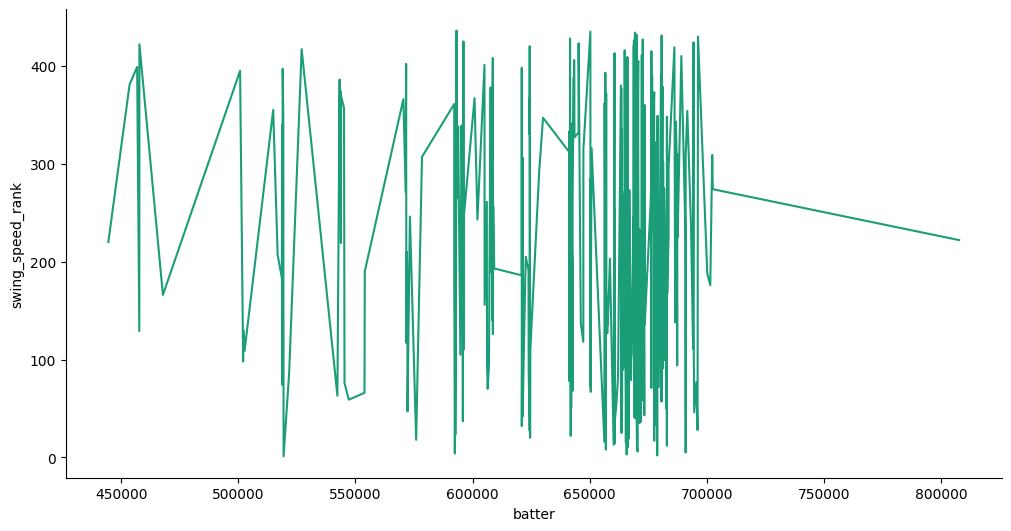

In [ ]:
final_comp_rank.to_csv('final_comp_rank.csv', index=False)